In [3]:
%load_ext autoreload
%autoreload 2

from dotenv import load_dotenv
from time import sleep
import os

while 'requirements.txt' not in os.listdir():
    os.chdir('..')

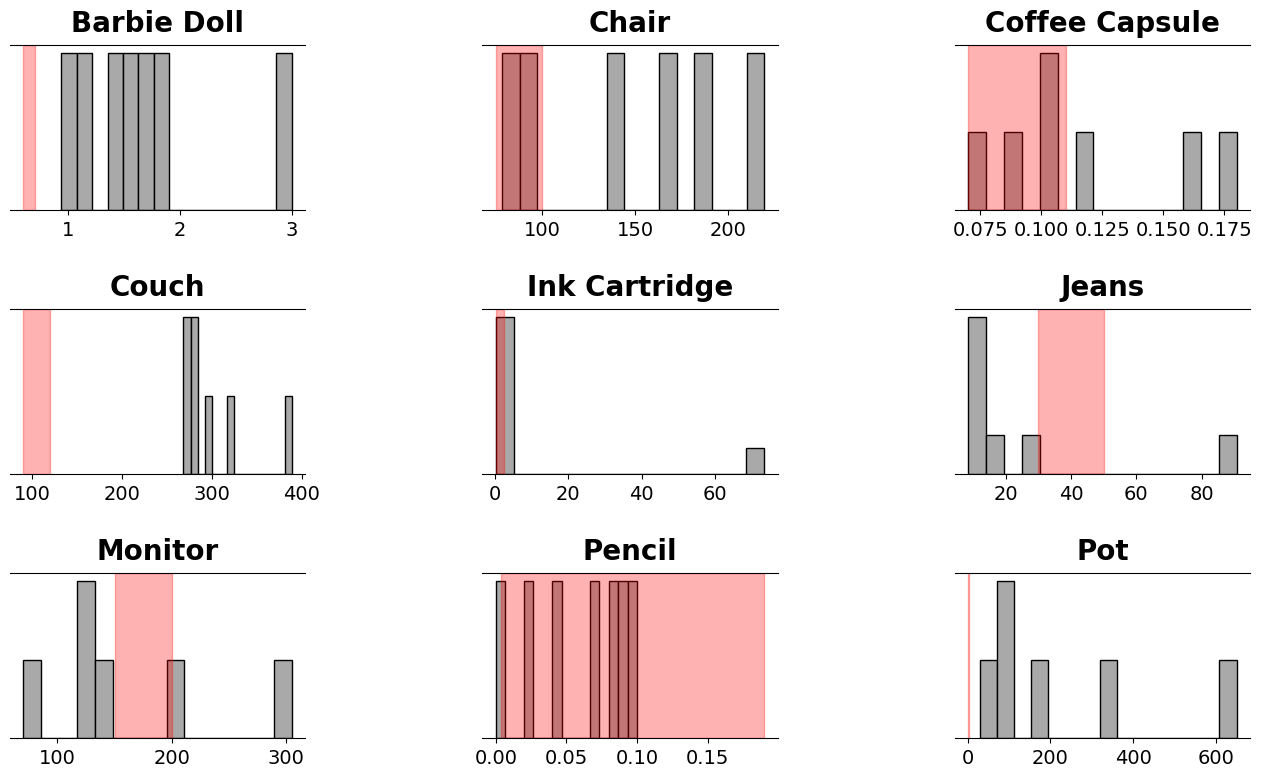

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Use a clean, modern sans-serif font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'Arial']
plt.rcParams['axes.titleweight'] = 'bold'

# Load and clean column names
co2_data = pd.read_csv('./notebooks/data/carbon_footprint_analyses_20250509_111522.csv')
co2_data.columns = co2_data.columns.str.strip()

co2_ref = pd.read_csv('./notebooks/data/co2_ref.csv')
co2_ref.columns = co2_ref.columns.str.strip()

# Determine unique product IDs (limit to first 9)
products = sorted(co2_data['item'].unique())[:9]

# Create 3x3 grid of histograms with extra whitespace
fig, axes = plt.subplots(3, 3, figsize=(16, 9))
axes = axes.flatten()

# Overall title with larger, bold font
#fig.suptitle('CO₂ Emissions by Product with Reference Ranges', fontsize=26, y=0.95)

for ax, pid in zip(axes, products):
    values = co2_data.loc[co2_data['item'] == pid, 'total_carbon']
    ref_row = co2_ref[co2_ref['item'] == pid].iloc[0]
    lbound, ubound = ref_row['lbound'], ref_row['ubound']
    
    # Dark grey histogram with black edges
    ax.hist(values, bins=15, color='darkgrey', edgecolor='black', linewidth=1)
    # Light transparent red overlay
    ax.axvspan(lbound, ubound, color='red', alpha=0.3)
    
    # Larger, title-cased subplot titles
    ax.set_title(pid.replace('_', ' ').title(), fontsize=20, pad=10)
    
    # Hide the entire y-axis
    ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Show x-axis with larger tick labels
    ax.tick_params(axis='x', which='both', bottom=True, labelbottom=True, labelsize=14)
    ax.spines['bottom'].set_visible(True)
    
    # Remove grid lines
    ax.grid(False)

# Turn off any unused axes
for ax in axes[len(products):]:
    ax.axis('off')

# Add more space between subplots
fig.subplots_adjust(wspace=0.6, hspace=0.6)

plt.show()